In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style='whitegrid')

df = pd.read_csv('Clean_Sales_Data.csv') 


In [4]:
print("Dataset Shape (Rows, Columns):", df.shape)
print("Column Names:", df.columns.tolist())


Dataset Shape (Rows, Columns): (100, 14)
Column Names: ['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority', 'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']


In [5]:

df.info()

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [6]:
print("Missing Values:\n", df.isnull().sum())
print("Duplicate Rows:", df.duplicated().sum())


Missing Values:
 Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64
Duplicate Rows: 0


In [7]:
df.dtypes


Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

In [8]:
df.nunique()


Region              7
Country            76
Item Type          12
Sales Channel       2
Order Priority      4
Order Date        100
Order ID          100
Ship Date          99
Units Sold         99
Unit Price         12
Unit Cost          12
Total Revenue     100
Total Cost        100
Total Profit      100
dtype: int64

In [9]:
for col in df.select_dtypes(include='object'):
    print(f"\n{col} value counts:\n", df[col].value_counts().head())




Region value counts:
 Region
Sub-Saharan Africa              36
Europe                          22
Australia and Oceania           11
Asia                            11
Middle East and North Africa    10
Name: count, dtype: int64

Country value counts:
 Country
The Gambia               4
Sierra Leone             3
Sao Tome and Principe    3
Mexico                   3
Australia                3
Name: count, dtype: int64

Item Type value counts:
 Item Type
Clothes            13
Cosmetics          13
Office Supplies    12
Fruits             10
Personal Care      10
Name: count, dtype: int64

Sales Channel value counts:
 Sales Channel
Offline    50
Online     50
Name: count, dtype: int64

Order Priority value counts:
 Order Priority
H    30
L    27
C    22
M    21
Name: count, dtype: int64

Order Date value counts:
 Order Date
5/28/2010     1
10/30/2010    1
5/20/2017     1
5/26/2011     1
8/14/2015     1
Name: count, dtype: int64

Ship Date value counts:
 Ship Date
11/17/2010    2
6/27/2

In [10]:

df.groupby('Country')['Total Revenue'].mean().sort_values(ascending=False)


Country
Lithuania      5396577.27
Brunei         4368316.68
Pakistan       4324782.40
Samoa          4220728.80
Iceland        3876652.40
                  ...    
Syria            35304.72
Slovakia         26344.26
New Zealand      20404.71
Kyrgyzstan       19103.44
Kuwait            4870.26
Name: Total Revenue, Length: 76, dtype: float64

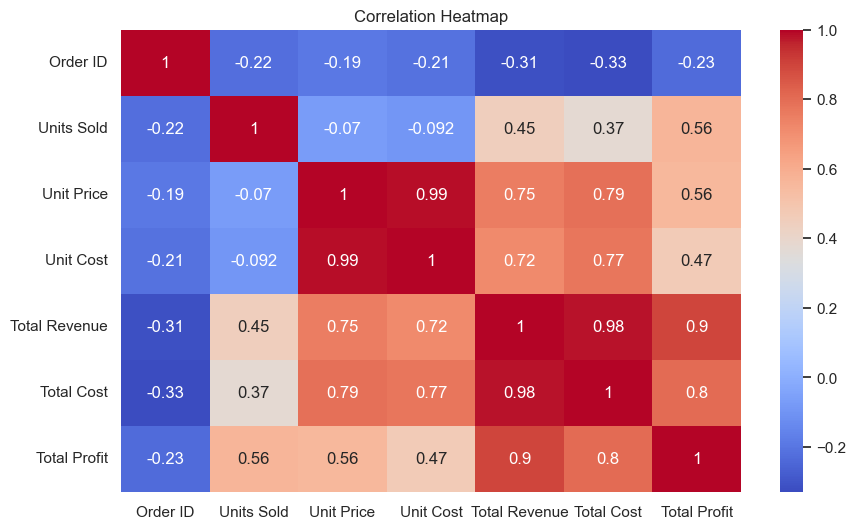

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


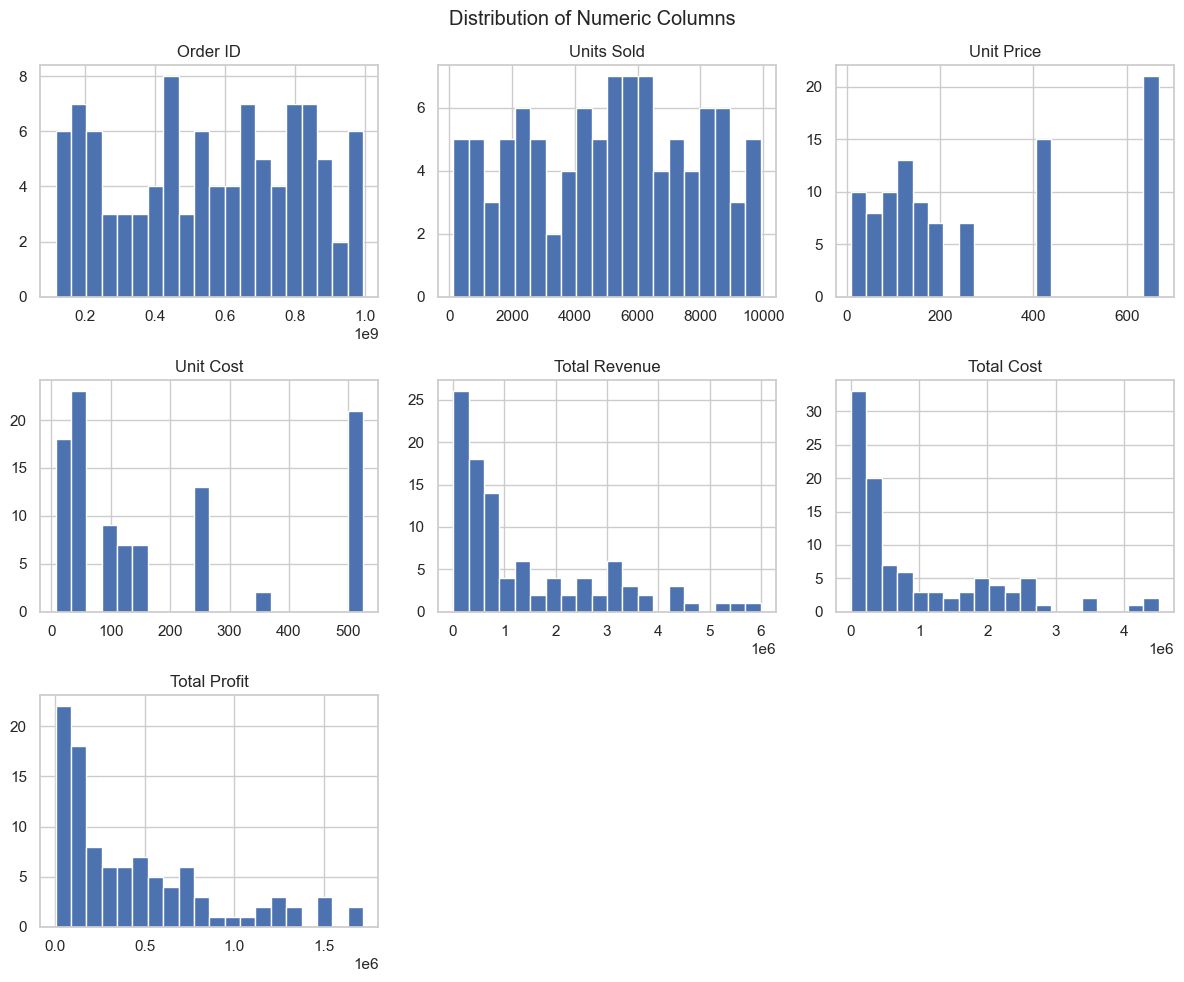

In [12]:
df.select_dtypes(include='number').hist(figsize=(12, 10), bins=20)
plt.suptitle("Distribution of Numeric Columns")
plt.tight_layout()
plt.show()


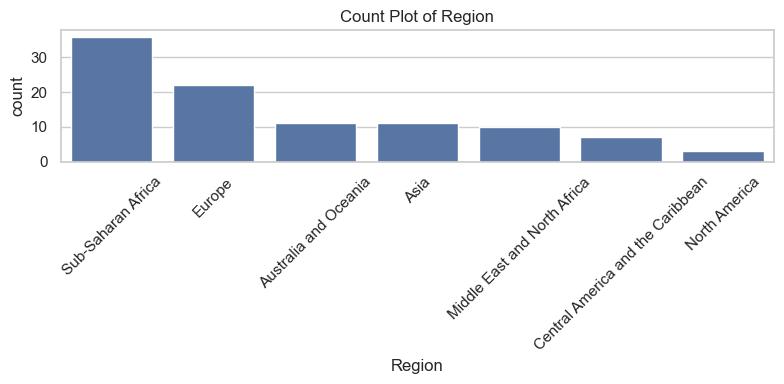

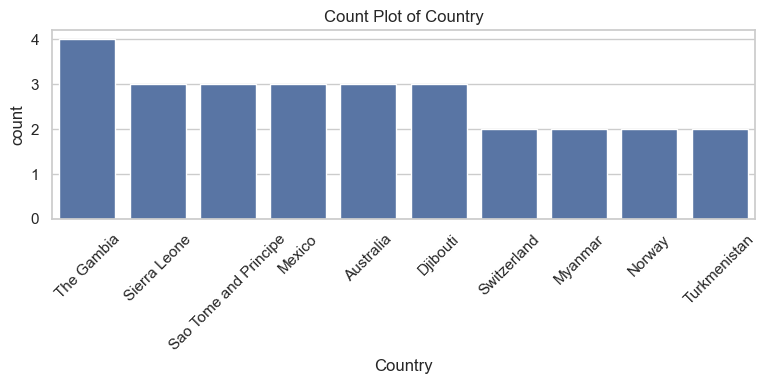

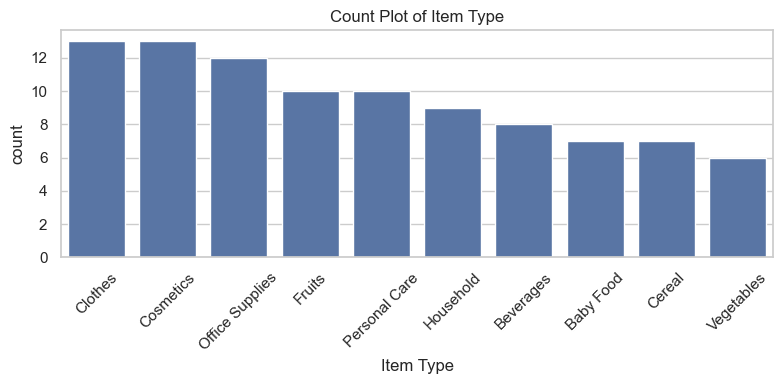

In [13]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
for col in categorical_cols[:3]: 
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10])
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


C:\Users\hidai\AppData\Local\Temp\ipykernel_1996\1695062505.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='crest')


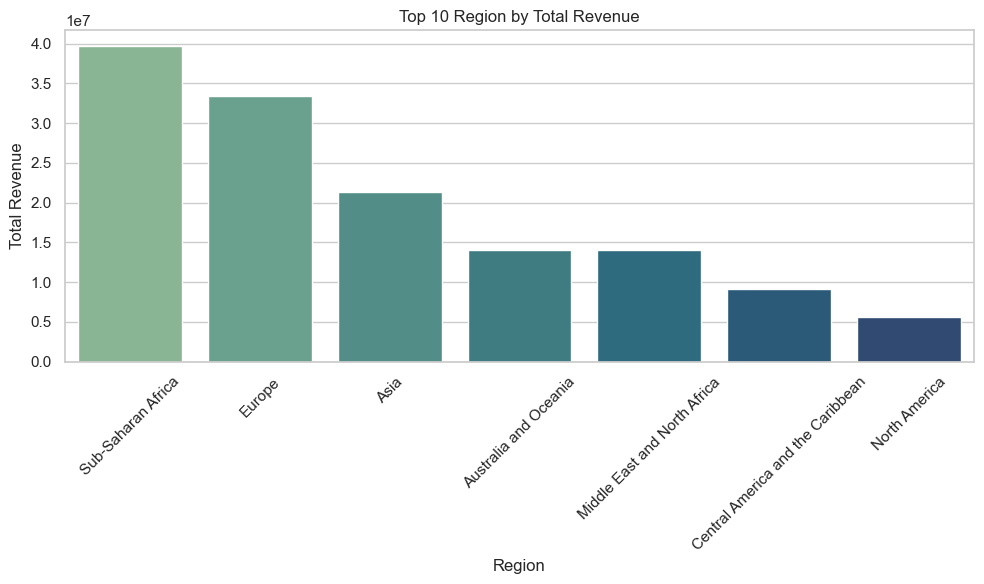

In [14]:
# Group by country and sum total revenue
top_countries = df.groupby('Region')['Total Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='crest')
plt.xticks(rotation=45)
plt.title('Top 10 Region by Total Revenue')
plt.ylabel('Total Revenue')
plt.xlabel('Region')
plt.tight_layout()
plt.show()
